### This script explores the analytical solutions for the relationship between flux and slope based on different transport models in the landscape evolution literature

Authors: Alba M. Rodriguez Padilla, Ramon Arrowsmith, Mindy Zuckerman

In [1]:
# first, import python packages
import numpy as np
import matplotlib.pyplot as plt

#### Transport laws considered

Di Michieli Vitturi and Arrowsmith (2013)

$$
qs = \frac{k \cdot dh}{\left(1 - \frac{dh}{sc}\right)^n}
$$

Ganti (2013)

$$
qs = k \cdot dh + \left(\frac{k}{sc^2}\right) \cdot dh^3
$$

Andrews and Hanks (1985)

$$
qs = k \frac{dh}{1 - \left(\frac{ dh}{sc}\right)^2}
$$

Linear diffusion:

$$
qs = k \cdot dh
$$

| Parameter | Description              | Units        |
|-----------|--------------------------|--------------|
|  qs  | Soil flux |$\frac{1}{m^2}$ |
|  k  | Diffusivity  | $\frac{1}{m^2}$  |
|  dh   | Slope | - |
|  sc   | Critical slope       | - |
|  n    | Exponent   | -   |


In [2]:
# user-defined parameters
k = 1
# diffusivity 1/m^2
sc = 0.65
# critical slope
dh = np.linspace(0, sc, 1000)  # slope
dh_ganti = np.linspace(
    0, 1.5, 1000
)  # slope (extending beyond critical slope for Ganti implementation)
gradients = np.loadtxt("Code output csv/initial_slopes.txt")  # from DEMs

In [3]:
def Xu_nonlinear(k, dh, sc, n=2):
    """Estimate soil flux as function of slope using the Xu et al. solution"""
    qs = (k * dh) / ((1 - dh / sc) ** n)
    return qs


def Ganti_nonlinear(k, dh, sc):
    """Estimate soil flux as function of slope using the Ganti et al. solution"""
    qs = k * dh + ((k / sc**2) * dh**3)
    return qs


def linear(k, dh):
    """Estimate soil flux as function of slope under the assumption of linear diffusion"""
    qs = k * dh
    return qs

# ref to bottom cell for equations

### Visualize solutions for different transport laws

/var/folders/kg/j5ms0y1x28l_gm2jtsf5j4pr0000gn/T/ipykernel_62454/1066822328.py:3: RuntimeWarning: divide by zero encountered in divide
  qs = (k * dh) / ((1 - dh / sc) ** n)


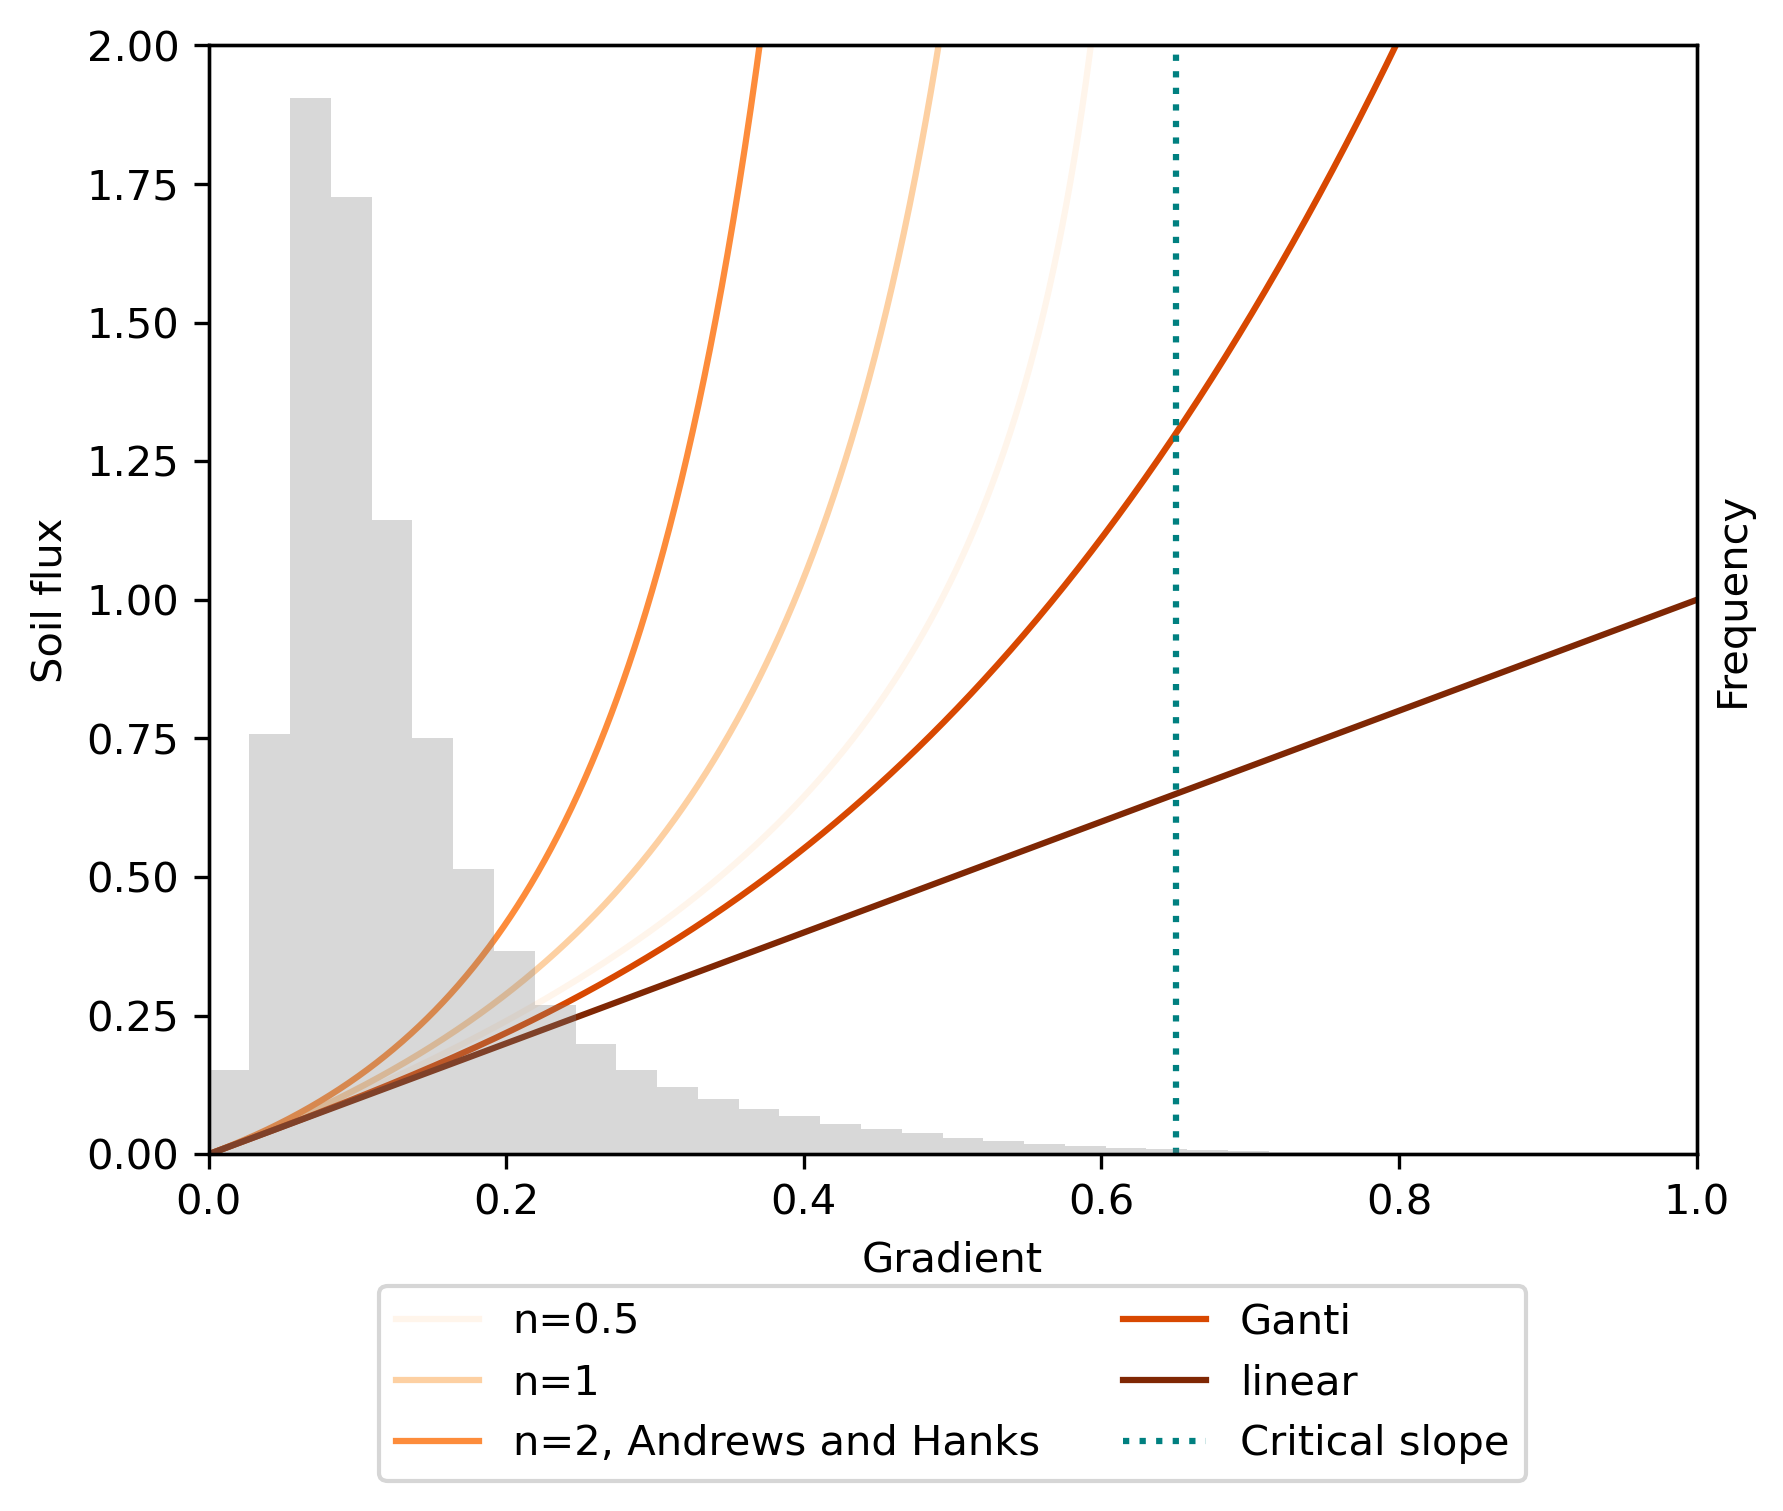

In [4]:
cmap = plt.cm.Oranges
colors = cmap(np.linspace(0, 1, 5))
fig, ax1 = plt.subplots(dpi=300)
ax1.plot(dh, Xu_nonlinear(k, dh, sc, 0.5), label="n=0.5", color=colors[0])
ax1.plot(dh, Xu_nonlinear(k, dh, sc, 1), label="n=1", color=colors[1])
ax1.plot(
    dh, Xu_nonlinear(k, dh, sc, 2), label="n=2, Andrews and Hanks", color=colors[2]
)
ax1.plot(dh_ganti, Ganti_nonlinear(k, dh_ganti, sc), label="Ganti", color=colors[3])
ax1.plot(dh_ganti, linear(k, dh_ganti), label="linear", color=colors[4])
ax1.set_xlabel("Gradient")
ax1.set_ylabel("Soil flux")
ax1.axvline(sc, linestyle=":", color="teal", label="Critical slope")
ax1.set_ylim(0, 2)
ax1.set_xlim(0, 1)

ax2 = ax1.twinx()
ax2.hist(gradients, bins=50, alpha=0.3, color="gray")
ax2.set_ylabel("Frequency")
ax2.set_yticks([])


ax1.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig("Figures/soil_flux.png", bbox_inches="tight")

References:

1.  de' Michieli Vitturi, M., & Arrowsmith, J. R. (2013). Two‐dimensional nonlinear diffusive numerical simulation of geomorphic modifications to cinder cones. *Earth Surface Processes and Landforms, 38*(12), 1432-1443.

2.  Ganti, V., Passalacqua, P., Foufoula-Georgiou, E. (2012). A sub-grid scale closure for nonlinear hillslope sediment transport models. *Journal of Geophysical Research: Earth Surface, 117*(F2).

3.  Xu, J., Arrowsmith, J. R., Chen, J., Schoenbohm, L. M., Li, T., Yuan, Z., & Owen, L. A. (2021). Evaluating young fluvial terrace riser degradation using a nonlinear transport model: Application to the Kongur Normal Fault in the Pamir, northwest China. *Earth Surface Processes and Landforms, 46*(1), 280-295.

